# Gridbox Concretos para ver su Precipitación y Temperatura Máxima

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


In [2]:
load("pr_iberia01_1971-2015.Rdata")
pr <- data
load("tasmax_iberia01_1971-2015.Rdata")
tmax <- data
rm(data)

## Galicia (Finisterre)

In [3]:
prF <- subsetGrid(pr, latLim = 42.9, lonLim = -9.3)
tmaxF <- subsetGrid(tmax, latLim = 42.9, lonLim = -9.3)

In [5]:
q10F <- climatology(prF, clim.fun = list(FUN = "quantile", probs = 0.10, na.rm = TRUE))
q90F <- climatology(tmaxF, clim.fun = list(FUN = "quantile", probs = 0.90, na.rm = TRUE))

[2024-03-18 12:53:11] - Computing climatology...
[2024-03-18 12:53:11] - Done.
[2024-03-18 12:53:11] - Computing climatology...
[2024-03-18 12:53:11] - Done.


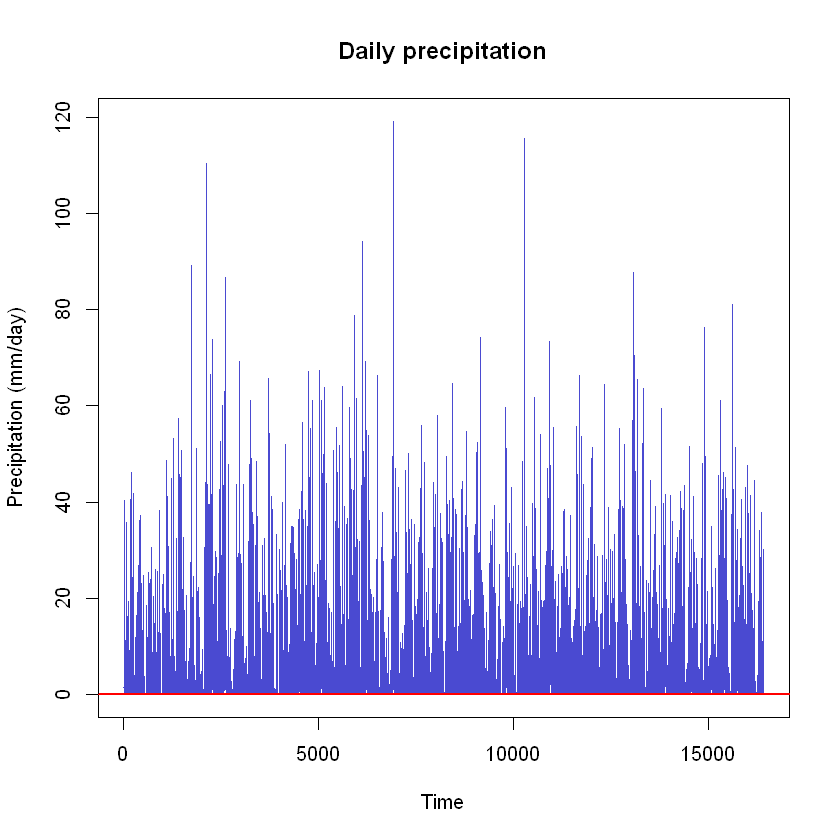

In [4]:
plot(prF$Data, type = "l", col = "#4a4ad1", ylab = "Precipitation (mm/day)", xlab = "Time", main = "Daily precipitation")
abline(h = q10F$Data, col = "red", lwd = 2)

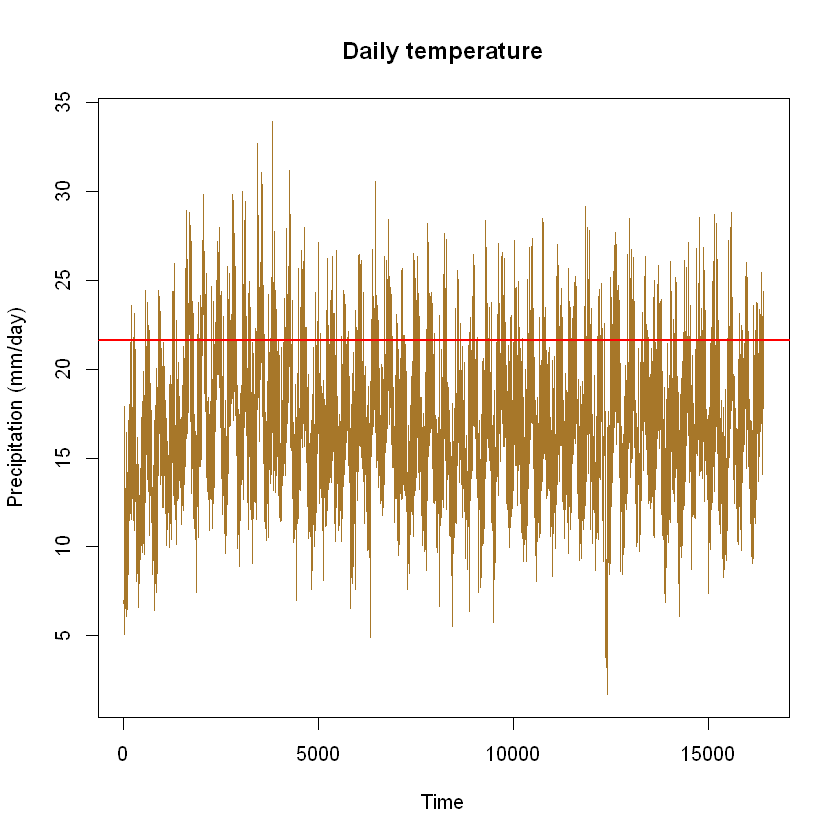

In [5]:
plot(tmaxF$Data, type = "l", col = "#a77729", ylab = "Precipitation (mm/day)", xlab = "Time", main = "Daily temperature")
abline(h = q90F$Data, col = "red", lwd = 2)

In [6]:
num_pr <- 0
num_tmax <- 0
for (i in 1:length(prF$Data)){
  if (prF$Data[i] < q10F$Data){
    num_pr <- num_pr + 1
  }
}

for (i in 1:length(tmaxF$Data)){
  if (tmaxF$Data[i] > q90F$Data){
    num_tmax <- num_tmax + 1
  }
}

print(paste0("Number of days with precipitation below the 10th percentile:  ", num_pr))
print(paste0("Number of days with maximum temperature above the 90th percentile:  ", num_tmax))


[1] "Number of days with precipitation below the 10th percentile:  1644"
[1] "Number of days with maximum temperature above the 90th percentile:  1644"


In [8]:
# Binarización de los dataset
prF_bin <- prF
for (i in 1:length(prF$Data)){
    if (prF$Data[i] < q10F$Data){
        prF_bin$Data[i] <- 1
    } else {
        prF_bin$Data[i] <- 0
    }
    
}


In [10]:
tmaxF_bin <- tmaxF
for (i in 1:length(tmaxF$Data)){
    if (tmaxF$Data[i] > q90F$Data){
        tmaxF_bin$Data[i] <- 1
    } else {
        tmaxF_bin$Data[i] <- 0
    }
    
}

In [21]:
CE <- prF_bin
for (i in 1:length(prF$Data)){
    if (prF_bin$Data[i] == 1 && tmaxF_bin$Data[i] == 1){
        CE$Data[i] <- 1
    } else {
        CE$Data[i] <- 0
    }
    
}

In [25]:
sum_CE <- climatology(CE, clim.fun = list(FUN = "sum", na.rm = TRUE))
print(paste0("Number of CE days:  ", sum_CE$Data))  

[2024-03-18 13:02:58] - Computing climatology...
[2024-03-18 13:02:58] - Done.


[1] "Number of CE days:  378"


## Andalucía (Córdoba)

In [27]:
prC <- subsetGrid(pr, latLim = 37.9, lonLim = -4.8)
q10C <- climatology(prC, clim.fun = list(FUN = "quantile", probs = 0.10, na.rm = TRUE))
tmaxC <- subsetGrid(tmax, latLim = 37.9, lonLim = -4.8)
q90C <- climatology(tmaxC, clim.fun = list(FUN = "quantile", probs = 0.90, na.rm = TRUE))

[2024-03-18 13:03:34] - Computing climatology...
[2024-03-18 13:03:34] - Done.
[2024-03-18 13:03:34] - Computing climatology...
[2024-03-18 13:03:34] - Done.


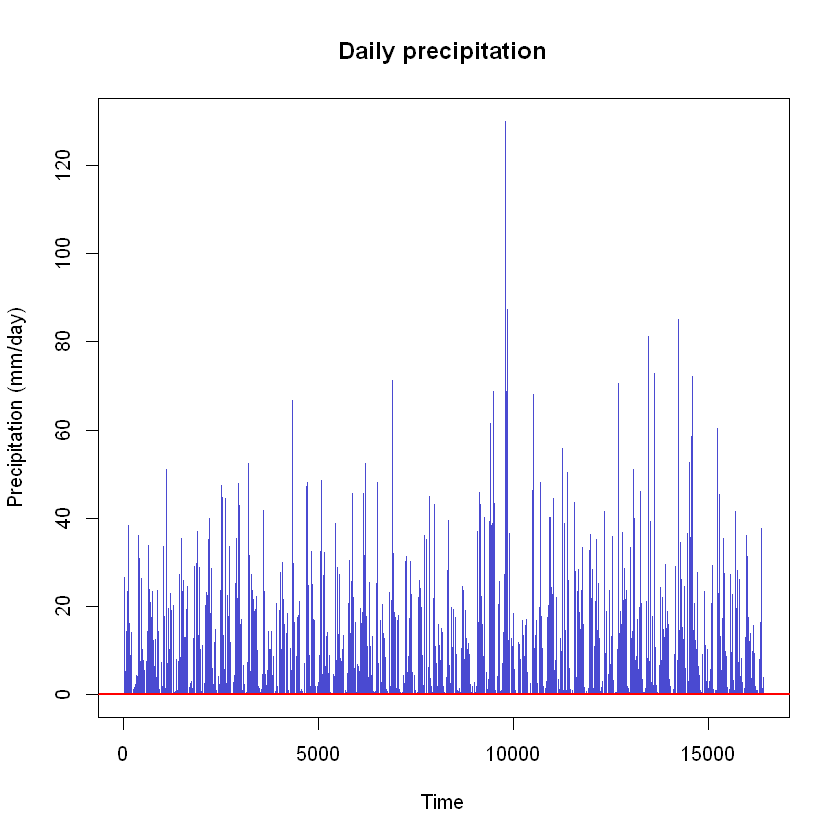

In [15]:
plot(prC$Data, type = "l", col = "#4a4ad1", ylab = "Precipitation (mm/day)", xlab = "Time", main = "Daily precipitation")
abline(h = q10C$Data, col = "red", lwd = 2)

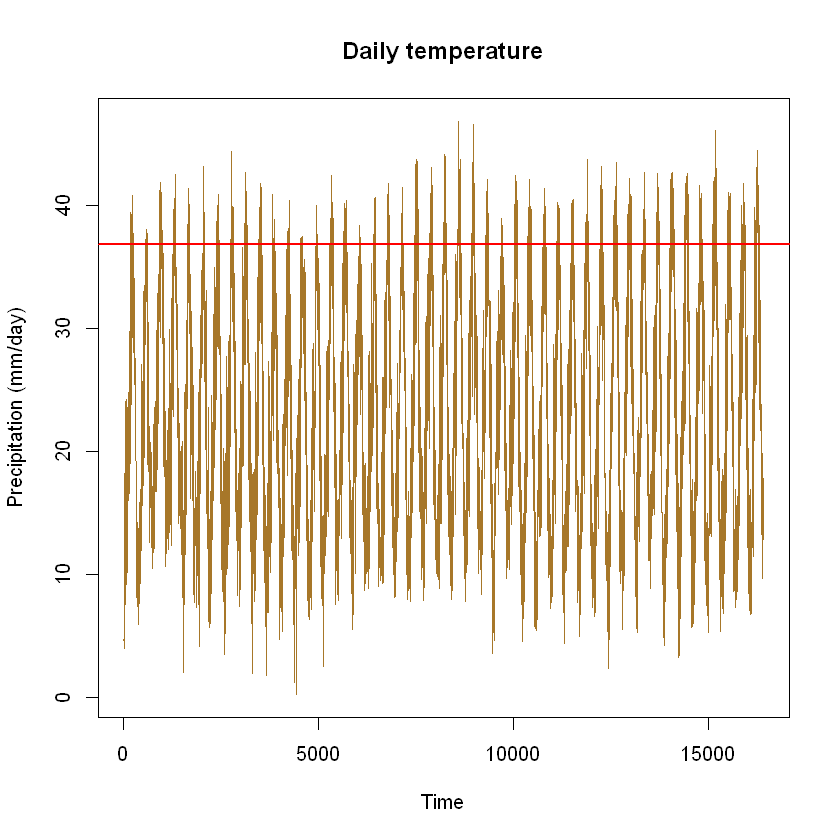

In [12]:
plot(tmaxC$Data, type = "l", col = "#a77729", ylab = "Precipitation (mm/day)", xlab = "Time", main = "Daily temperature")
abline(h = q90C$Data, col = "red", lwd = 2)

In [18]:
num_pr <- 0
num_tmax <- 0
for (i in 1:length(prC$Data)){
  if (prC$Data[i] <= q10C$Data){
    num_pr <- num_pr + 1
  }
}

for (i in 1:length(tmaxC$Data)){
  if (tmaxC$Data[i] > q90C$Data){
    num_tmax <- num_tmax + 1
  }
}

print(paste0("Number of days with precipitation below the 10th percentile:  ", num_pr))
print(paste0("Number of days with maximum temperature above the 90th percentile:  ", num_tmax))

[1] "Number of days with precipitation below the 10th percentile:  1838"
[1] "Number of days with maximum temperature above the 90th percentile:  1644"


In [28]:
prC_bin <- prC
for (i in 1:length(prC$Data)){
    if (prC$Data[i] < q10C$Data){
        prC_bin$Data[i] <- 1
    } else {
        prC_bin$Data[i] <- 0
    }
    
}

In [29]:
tmaxC_bin <- tmaxC
for (i in 1:length(tmaxC$Data)){
    if (tmaxC$Data[i] > q90C$Data){
        tmaxC_bin$Data[i] <- 1
    } else {
        tmaxC_bin$Data[i] <- 0
    }
    
}

In [30]:
CE_C <- prC_bin
for (i in 1:length(prC$Data)){
    if (prC_bin$Data[i] == 1 && tmaxC_bin$Data[i] == 1){
        CE_C$Data[i] <- 1
    } else {
        CE_C$Data[i] <- 0
    }
    
}

In [31]:
sum_CE_C <- climatology(CE_C, clim.fun = list(FUN = "sum", na.rm = TRUE))
print(paste0("Number of CE days:  ", sum_CE_C$Data))s

[2024-03-18 13:04:18] - Computing climatology...
[2024-03-18 13:04:18] - Done.


[1] "Number of CE days:  0"
